In [1378]:
# Librería para comando de sistema
import os
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías de aprendizaje automático.
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para construir un modelo con el algoritmo de regresión lineal
from sklearn.linear_model import LinearRegression
# Para determinar el rendimiento del modelo con las métricas MSE, MAE y R2
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

from scipy import stats
##Import pipeline

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


In [1379]:
# Se cargan los datos. 

test=pd.read_csv('laptop_data_test_unlabeled.csv')
train=pd.read_csv('laptop_data_train.csv')
print(train.shape)
print(test.shape)
train

(1216, 14)
(72, 14)


,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,Intel,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,Intel,Windows


In [1380]:
train.columns
features =[]
for i in train.columns:
    if i != "Precio":
        features.append(i)

features

['id',
 'Company',
 'TypeName',
 'Ram',
 'Weight',
 'Price',
 'TouchScreen',
 'Ips',
 'Ppi',
 'Cpu_brand',
 'HDD',
 'SSD',
 'Gpu_brand',
 'Os']

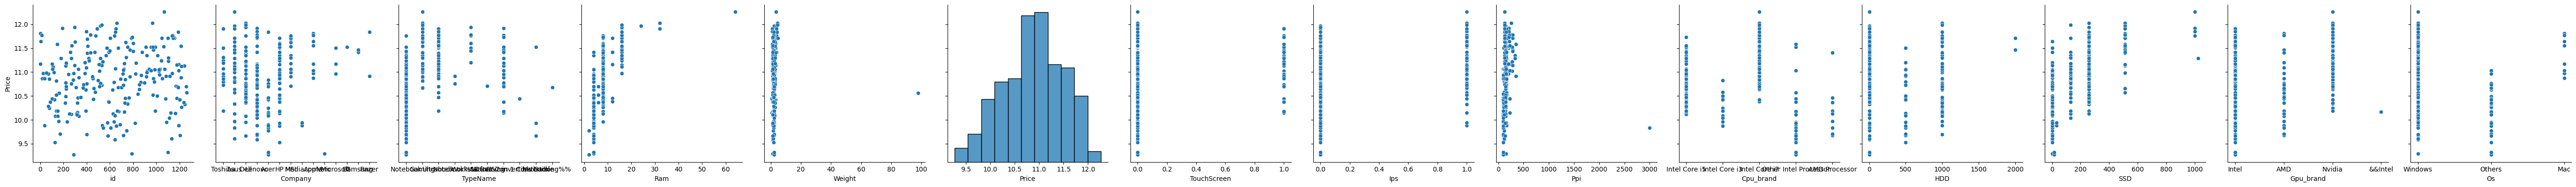

In [1381]:
sns.pairplot(train.sample(frac=0.2), height=4, y_vars="Price", x_vars=features, kind="scatter")

C:\Users\user\AppData\Local\Temp\ipykernel_13244\1491552344.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train[features].corr(), cmap="Blues", vmin=0, vmax=1)


<Axes: >

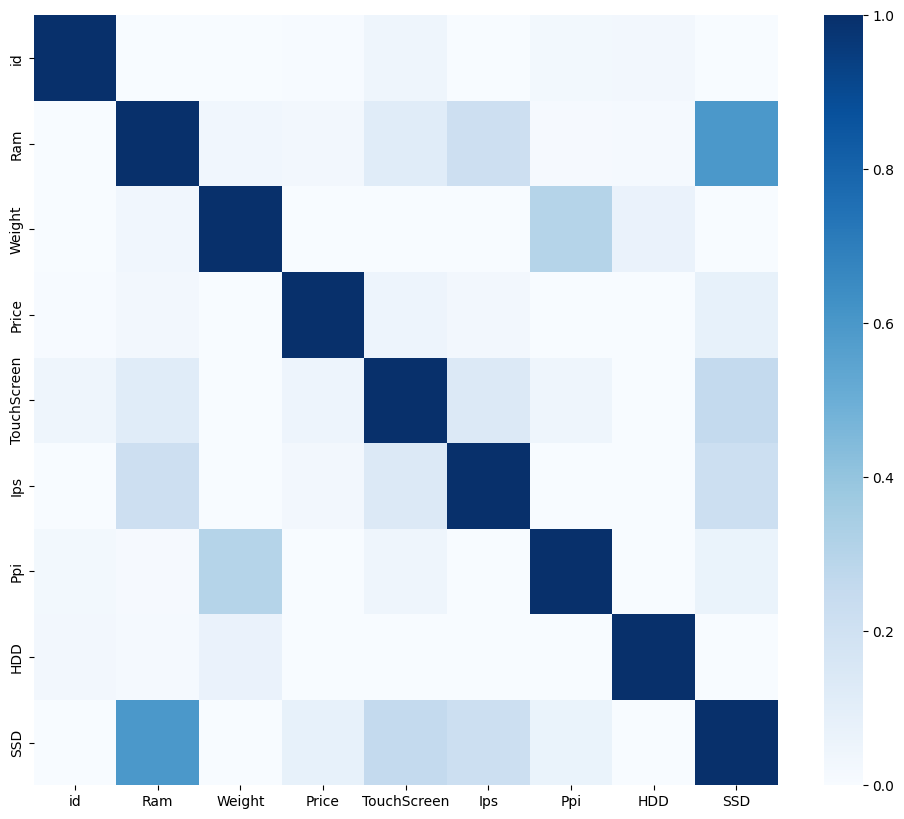

In [1382]:
plt.figure(figsize=(12, 10))
sns.heatmap(train[features].corr(), cmap="Blues", vmin=0, vmax=1)

Correlacion -> Ram

In [1383]:
train = train.dropna(subset=["Price"]+features)
train

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,704,Lenovo,Notebook,4,1.90,10.084809,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others
1,712,Dell,Notebook,8,1.98,10.563111,0,0,141.211998,Intel Core i5,1000.0,0,Intel,Others
2,1072,HP,Ultrabook,8,1.26,11.064804,0,0,176.232574,Intel Core i5,0.0,256,Intel,Windows
3,370,Asus,2 in 1 Convertible,12,2.26,10.977717,1,0,141.211998,Intel Core i7,2000.0,512,Nvidia,Windows
4,207,Dell,Ultrabook,8,1.21,11.550633,1,1,331.264236,Intel Core i7,0.0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,1039,HP,Notebook,8,1.64,10.893771,0,0,157.350512,Intel Core i5,0.0,256,Intel,Windows
1212,1090,Dell,Notebook,4,2.20,9.950617,0,0,100.454670,Other Intel Processor,500.0,0,Intel,Others
1213,1125,Lenovo,2 in 1 Convertible,8,1.80,11.395541,1,1,157.350512,Intel Core i7,0.0,256,Intel,Windows
1214,856,Asus,Notebook,4,2.00,10.082584,0,0,100.454670,Other Intel Processor,1000.0,0,Intel,Windows


In [1384]:
train.shape

(1170, 14)

In [1385]:
train[["Price"]+features].isnull().sum() / train.shape[0]

Price          0.0
id             0.0
Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
Price          0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

In [1386]:
train.loc[train.duplicated(subset=features, keep=False)].head(3)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
128,645,Lenovo,Notebook,4,1.43,9.588689,0,0,111.935204,Other Intel Processor,0.0,0,Intel,Windows
317,12,Apple,Ultrabook,16,1.83,11.775302,0,1,220.534624,Intel Core i7,0.0,256,AMD,Mac
363,12,Apple,Ultrabook,16,1.83,11.775302,0,1,220.534624,Intel Core i7,0.0,256,AMD,Mac


In [1387]:
duplicated_rows = train.loc[train.duplicated(subset=features, keep=False)].shape[0]
duplicated_rows

7

In [1388]:
print(f"Duplicates: {(duplicated_rows/train.shape[0])*100:.4f}%")

Duplicates: 0.5983%


In [1389]:
train.loc[train.duplicated(subset=features+["Price"], keep=False)].tail(4)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
658,182,Lenovo,2 in 1 Convertible,16,1.40,11.497961,1,1,316.965060,Intel Core i7,0.0,512,Intel,Windows
775,12,Apple,Ultrabook,16,1.83,11.775302,0,1,220.534624,Intel Core i7,0.0,256,AMD,Mac
798,182,Lenovo,2 in 1 Convertible,16,1.40,11.497961,1,1,316.965060,Intel Core i7,0.0,512,Intel,Windows
1096,645,Lenovo,Notebook,4,1.43,9.588689,0,0,111.935204,Other Intel Processor,0.0,0,Intel,Windows


In [1390]:
duplicated_rows = train.loc[train.duplicated(subset=features+["Price"], keep=False)].shape[0]
duplicated_rows

7

In [1391]:
print(f"Duplicates: {(duplicated_rows/train.shape[0])*100:.4f}%")

Duplicates: 0.5983%


Son iguales en dupliocados con la variable objetivo ingresada y sin la variable objetivo ingresada

In [1392]:
train.drop_duplicates(subset=features, inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_13244\4192124644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop_duplicates(subset=features, inplace=True)


In [1393]:
train.shape

(1166, 14)

In [1394]:
#profiling = pandas_profiling.ProfileReport(train)
#profiling

# Eliminar valores atipicos

* Eliminar niveles Notebook%%,&&Notebook,Gaming%%,&&Gaming (hay otros 3 por revisar)  del factor TypeName
* Eliminar 97.72994928 del factor Weight pues es un peso anormal para un computador.
* Eliminar 6170.032609 del factor Ppi pues es un dato extremo anormal
* Eliminar niveles Nvidia%%, Intel%%, &&Intel, &&Nvidia, AMD%%, &&AMD del factor Gpu_brand

In [1395]:
train.drop(train[train['TypeName'].str.contains('Notebook%%')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&Notebook')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('Gaming%%')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&Gaming')].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13244\3494432896.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('Notebook%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\3494432896.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('&&Notebook')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\3494432896.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [1396]:
train.drop(train[train['Weight'] == 97.72994928].index, inplace=True)
train.drop(train[train['Ppi'] == 6170.032609].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13244\4081659280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Weight'] == 97.72994928].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\4081659280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Ppi'] == 6170.032609].index, inplace=True)


In [1397]:
train.drop(train[train['Gpu_brand'].str.contains('Nvidia%%')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('Intel%%')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('&&Intel')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('&&Nvidia')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('AMD%%')].index, inplace=True)
train.drop(train[train['Gpu_brand'].str.contains('&&AMD')].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13244\1899622333.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Gpu_brand'].str.contains('Nvidia%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\1899622333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['Gpu_brand'].str.contains('Intel%%')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\1899622333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [1398]:
#profiling = pandas_profiling.ProfileReport(train)
#profiling

* Eliminar Netbook, &&2 in 1 Convertible de TypeName

In [1399]:
train.drop(train[train['TypeName'].str.contains('Netbook')].index, inplace=True)
train.drop(train[train['TypeName'].str.contains('&&2 in 1 Convertible')].index, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_13244\506055023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('Netbook')].index, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_13244\506055023.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(train[train['TypeName'].str.contains('&&2 in 1 Convertible')].index, inplace=True)


In [1400]:
numerical = train.select_dtypes(include=np.number).columns.tolist()
numerical.remove("id")
numerical.remove("Price")
numerical

categoricas = train.select_dtypes(exclude = np.number).columns.tolist()
categoricas

['Company', 'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os']

In [1401]:
x = train[numerical + categoricas]
y = train["Price"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
x_REAL_test = test[numerical+ categoricas]

In [1402]:
x_train.shape, x_train.shape

((837, 12), (837, 12))

In [1403]:
x_test.shape, x_test.shape

((280, 12), (280, 12))

In [1404]:


numerical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("encoder", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(sparse=True, handle_unknown="ignore"))
])

preprocessing_pipeline = ColumnTransformer([
    ("numerical_preprocessor", numerical_pipeline, numerical),
    ("categorical_preprocessor", categorical_pipeline, categoricas)
])




In [1405]:
preprocessing_pipeline

ColumnTransformer(transformers=[('numerical_preprocessor',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('encoder',
                                                  StandardScaler())]),
                                 ['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi',
                                  'HDD', 'SSD']),
                                ('categorical_preprocessor',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=True))]),
                                 ['Company', 'TypeName', 'Cpu_brand',
                                  'Gpu_brand', 'Os'])])

In [1406]:
#Todo en un pipeline

ML_model = LinearRegression()
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])

In [1407]:
complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])

In [1408]:
complete_pipeline.fit(x_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight',
                                                   'TouchScreen', 'Ips', 'Ppi',
                                                   'HDD', 'SSD']),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=True))]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'Os'])])),
                ('estimator', LinearRegression())])

In [1409]:
# Obtener los coeficientes del modelo
coef = complete_pipeline.named_steps['estimator'].coef_

coef

x_train.columns

Index(['Ram', 'Weight', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD', 'Company',
       'TypeName', 'Cpu_brand', 'Gpu_brand', 'Os'],
      dtype='object')

In [1410]:
df = pd.DataFrame({"columnas": complete_pipeline["preprocessor"], "coef": complete_pipeline["estimator"].coef_})

In [1411]:
df

,columnas,coef
0,ColumnTransformer(transformers=[('numerical_pr...,-1.364235
1,ColumnTransformer(transformers=[('numerical_pr...,-1.235996
2,ColumnTransformer(transformers=[('numerical_pr...,-1.215014
3,ColumnTransformer(transformers=[('numerical_pr...,0.482557
4,ColumnTransformer(transformers=[('numerical_pr...,0.011523
5,ColumnTransformer(transformers=[('numerical_pr...,1.424928
6,ColumnTransformer(transformers=[('numerical_pr...,3.739954
7,ColumnTransformer(transformers=[('numerical_pr...,0.860129
8,ColumnTransformer(transformers=[('numerical_pr...,-0.811995
9,ColumnTransformer(transformers=[('numerical_pr...,0.343176


In [1412]:
complete_pipeline["estimator"].intercept_

11.67813598216039

In [1413]:
y_train.mean(), y_test.mean()

(12.249857155141916, 11.653971130850518)

In [1414]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, complete_pipeline.predict(x_train)))
print("Test:", mean_absolute_error(y_test, complete_pipeline.predict(x_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, complete_pipeline.predict(x_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, complete_pipeline.predict(x_test))))

MAE:
Train: 4.048037917820974
Test: 4.282763841506325

RMSE:
Train: 23.910339975880976
Test: 16.663734889581793


# Validacion Supuestos

C:\Users\user\AppData\Local\Temp\ipykernel_13244\2435057260.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(x_train.corr(), cmap="Blues", vmin=0, vmax=1)


<Axes: >

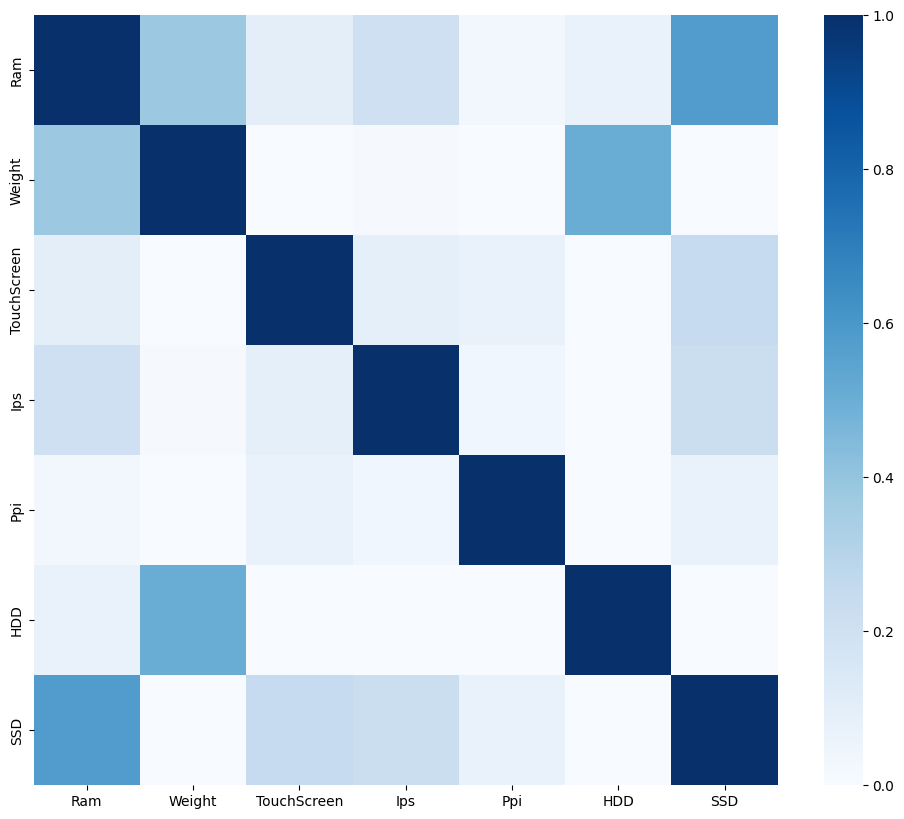

In [1415]:
plt.figure(figsize=(12, 10))
sns.heatmap(x_train.corr(), cmap="Blues", vmin=0, vmax=1)

In [1416]:
x_train.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_13244\956354856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x_train.corr()


,Ram,Weight,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.379222,0.105234,0.207449,0.028157,0.071568,0.580604
Weight,0.379222,1.000000,-0.293054,0.014361,-0.067498,0.507240,-0.079964
TouchScreen,0.105234,-0.293054,1.000000,0.095923,0.073803,-0.221923,0.251203
Ips,0.207449,0.014361,0.095923,1.000000,0.037594,-0.116610,0.229684
Ppi,0.028157,-0.067498,0.073803,0.037594,1.000000,-0.061000,0.070759
HDD,0.071568,0.507240,-0.221923,-0.116610,-0.061000,1.000000,-0.428344
SSD,0.580604,-0.079964,0.251203,0.229684,0.070759,-0.428344,1.000000


En este caso particular, para eliminar variables de correlacion se opta por elegir aquellas con un numero superior a 0.4%. Podemos elegir en este caso aquellas que estan causando correlacion con las variables, es decir:

* SSD esta correlacionada con Ram, sin embargo, podemos darnso ceunta que RAM no esta correlacionada con ninguna otra. Por esto, elegimos a SSD para eliminar.

* PPi tambien esta correlacionada con TouchScreen, al igual que en el caso anterior, TouchScreen unicamente esta correlacionada con esta, por eso, elegimos para eliminar a PPi.

In [1417]:
numerical.remove("SSD")
numerical.remove("Ppi")
#numerical.remove("Ips")

In [1418]:


x = train[numerical + categoricas]
y = train["Price"]

nx_train, nx_test, ny_train, ny_test = train_test_split(x, y, random_state=0)
x_REAL_test = test[numerical+ categoricas]


preprocessing_pipeline = ColumnTransformer([
    ("numerical_preprocessor", numerical_pipeline, numerical),
    ("categorical_preprocessor", categorical_pipeline, categoricas)
])

complete_pipeline = Pipeline([
    ("preprocessor", preprocessing_pipeline),
    ("estimator", ML_model)
])


In [1419]:
complete_pipeline.fit(nx_train, ny_train)

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('encoder',
                                                                   StandardScaler())]),
                                                  ['Ram', 'Weight',
                                                   'TouchScreen', 'Ips',
                                                   'HDD']),
                                                 ('categorical_preprocessor',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=True))]),
                                                  ['Company', 'TypeName',
                                                   'Cpu_brand', 'Gpu_brand',
                                                   'Os'])])),
                ('estimator', LinearRegression())])

In [1420]:
complete_pipeline["estimator"]

LinearRegression()

In [1421]:
complete_pipeline["estimator"].intercept_

10.396047844013207

In [1422]:
ny_train.mean(), ny_test.mean()

(12.249857155141916, 11.653971130850518)

In [1423]:
print("MAE:")
print("Train:", mean_absolute_error(ny_train, complete_pipeline.predict(nx_train)))
print("Test:", mean_absolute_error(ny_test, complete_pipeline.predict(nx_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(ny_train, complete_pipeline.predict(nx_train))))
print("Test:", np.sqrt(mean_squared_error(ny_test, complete_pipeline.predict(nx_test))))

MAE:
Train: 3.6220937840702523
Test: 3.885208656333416

RMSE:
Train: 24.01619391591901
Test: 18.80336119151303


In [1424]:

features2 = [
 'Company',
 'TypeName',
 'Ram',
 'Weight',
 'Price',
 'TouchScreen',
 'Cpu_brand',
 'HDD',
 'Gpu_brand',
 'Ips',
 'Os']

In [1425]:
nx_train.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_13244\3857758447.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  nx_train.corr()


,Ram,Weight,TouchScreen,Ips,HDD
Ram,1.000000,0.379222,0.105234,0.207449,0.071568
Weight,0.379222,1.000000,-0.293054,0.014361,0.507240
TouchScreen,0.105234,-0.293054,1.000000,0.095923,-0.221923
Ips,0.207449,0.014361,0.095923,1.000000,-0.116610
HDD,0.071568,0.507240,-0.221923,-0.116610,1.000000


# Independencia Lineal

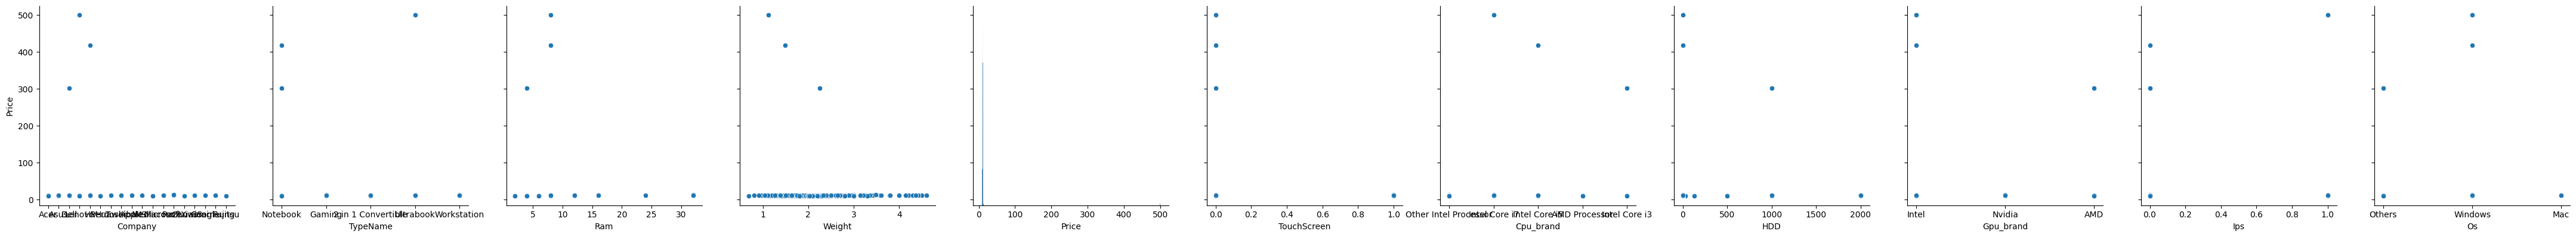

In [1426]:
sns.pairplot(pd.concat([nx_train, ny_train], axis=1), height=4, y_vars="Price", x_vars=features2, kind="scatter")

# Normalidad

In [1427]:

errors = (complete_pipeline.predict(nx_train)-ny_train).values

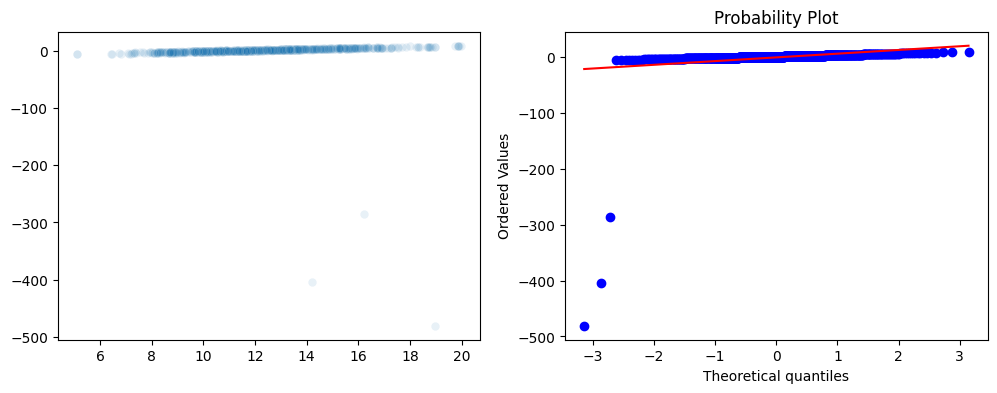

In [1428]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=complete_pipeline.predict(nx_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

# Homocedasticidad

<Axes: >

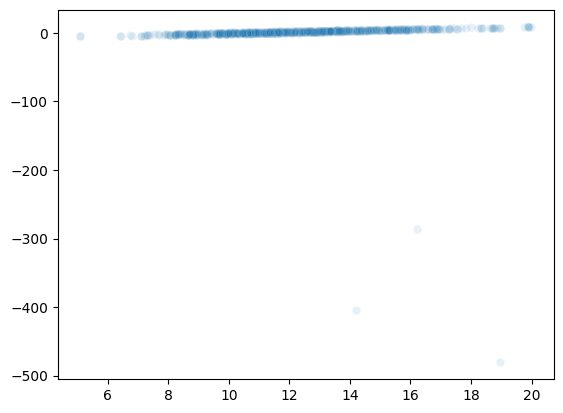

In [1429]:
sns.scatterplot(x = complete_pipeline.predict(nx_train), y=errors, alpha=0.1)

# Errores

Podemos observar que tenemos errores en la Normalidad y en la Homocedasticidad, por lo tanto, debemos aplicar una transformacion lineal a los datos para que siga esta distribucion.

In [1430]:
nye_train = np.log(ny_train)
errors = (complete_pipeline.predict(nx_train)-nye_train).values

Ahora realizamos las pruebas nuevamente

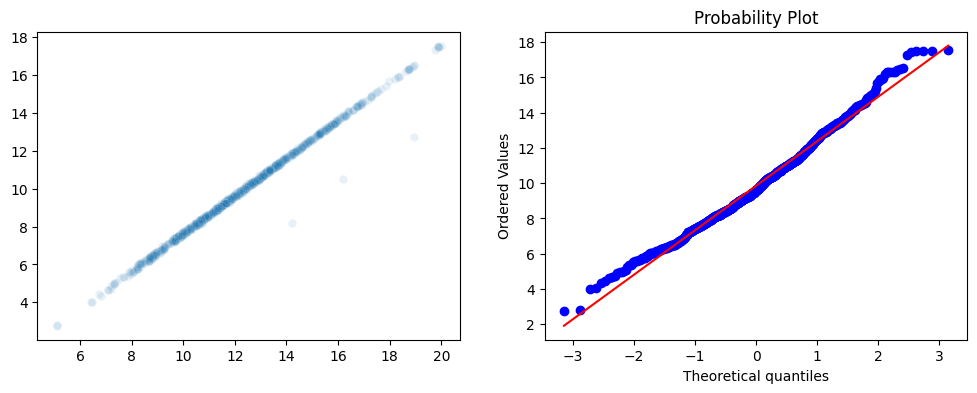

In [1431]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=complete_pipeline.predict(nx_train), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

<Axes: >

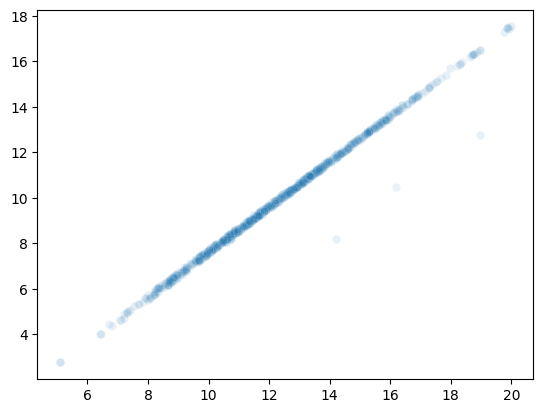

In [1432]:
sns.scatterplot(x = complete_pipeline.predict(nx_train), y=errors, alpha=0.1)

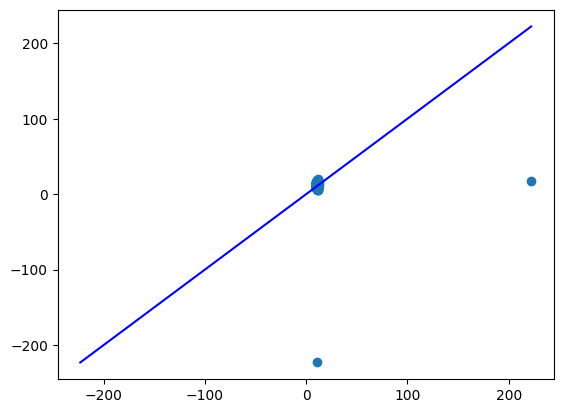

In [1433]:
p1 = max(max(complete_pipeline.predict(nx_test)),max(ny_test))
p2 = min(min(complete_pipeline.predict(nx_test)),min(ny_test))
plt.plot([p1,p2],[p1,p2],"b-")
plt.scatter(ny_test,complete_pipeline.predict(nx_test))

# Prueba con el dataFrame Real

In [1434]:
y_REAL_test = complete_pipeline.predict(x_REAL_test)

In [1435]:
pred = pd.DataFrame(y_REAL_test)
sub_df = pd.read_csv("laptop_data_test_unlabeled.csv")
sub_df.columns

Index(['id', 'Company', 'TypeName', 'Ram', 'Weight', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os', 'CalculatedPrice'],
      dtype='object')

In [1436]:
datasets = pd.concat([sub_df["id"],sub_df["Company"]
                      ,sub_df["TypeName"],sub_df["Ram"]
                      ,sub_df["Weight"],sub_df["TouchScreen"]
                      ,sub_df["Ips"],sub_df["Ppi"]
                      ,sub_df["Cpu_brand"],sub_df["HDD"]
                      ,sub_df["SSD"],sub_df["Gpu_brand"]
                      ,sub_df["Os"],pred],axis=1)
datasets.columns = ["id","Company","TypeName","Ram","Weight","TouchScreen","Ips","Ppi","Cpu_brand","HDD","SSD","Gpu_brand","Os","CalculatedPrice"]
datasets.to_csv("Answers.csv", index=False)

In [1437]:
print("MAE:")
print("Train:", mean_absolute_error(ny_train, complete_pipeline.predict(nx_train)))
print("Test:", mean_absolute_error(ny_test, complete_pipeline.predict(nx_test)))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(ny_train, complete_pipeline.predict(nx_train))))
print("Test:", np.sqrt(mean_squared_error(ny_test, complete_pipeline.predict(nx_test))))

MAE:
Train: 3.6220937840702523
Test: 3.885208656333416

RMSE:
Train: 24.01619391591901
Test: 18.80336119151303


In [1438]:
datasets.head(10)

,id,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,CalculatedPrice
0,704,Lenovo,Notebook,4,1.90,0,0,100.454670,Intel Core i3,500.0,0,Intel,Others,15.566048
1,241,Asus,Notebook,8,2.10,0,0,127.335675,Intel Core i7,1000.0,128,Nvidia,Windows,9.412200
2,1042,Toshiba,Notebook,16,2.40,0,1,141.211998,Intel Core i7,0.0,256,Nvidia,Windows,9.675680
3,217,HP,Notebook,8,1.63,0,0,157.350512,Intel Core i7,0.0,256,Nvidia,Windows,12.780109
4,302,Lenovo,Notebook,6,2.80,0,0,106.113062,Intel Core i5,1000.0,0,Nvidia,Windows,9.077233
5,824,Lenovo,Ultrabook,8,1.13,0,1,157.350512,Intel Core i5,0.0,0,Intel,Windows,18.793217
6,888,Acer,Netbook,4,1.25,0,1,135.094211,Other Intel Processor,0.0,0,Intel,Others,14.543592
7,463,Lenovo,Notebook,8,1.50,0,1,157.350512,Intel Core i7,0.0,512,AMD,Others,19.877362
8,1261,Dell,Notebook,6,2.30,0,0,100.454670,Intel Core i3,1000.0,0,Intel,Windows,12.160883
9,880,HP,2 in 1 Convertible,4,1.28,1,0,165.632118,Intel Core i5,0.0,256,Intel,Windows,11.320733
